# **FIONA HARIA | 60009220048 | D1-2 | D040**

# **Importing Libraries**

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [25]:
image_path = '/content/nature.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# **Displaying the Binary Image**

In [26]:
threshold = 128
binary_image = np.where(image > threshold, 1, 0).astype(np.uint8)

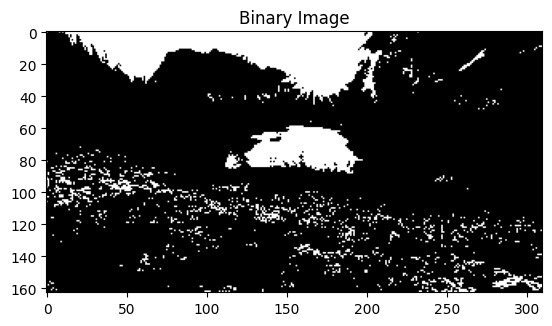

In [27]:
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.show()

# **Applying Erosion and showing the before and after image**

In [31]:
kernel = np.ones((3, 3), dtype=np.uint8)

def image_erosion(input_image, kernel):
    img_h, img_w = input_image.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2
    result_image = np.zeros_like(input_image)
    padded_img = np.pad(input_image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    for row in range(pad_h, img_h + pad_h):
        for col in range(pad_w, img_w + pad_w):
            region = padded_img[row - pad_h:row + pad_h + 1, col - pad_w:col + pad_w + 1]

            if np.min(region) == 1:
                result_image[row - pad_h, col - pad_w] = 1

    return result_image

In [32]:
eroded_image = erode(binary_image, kernel)

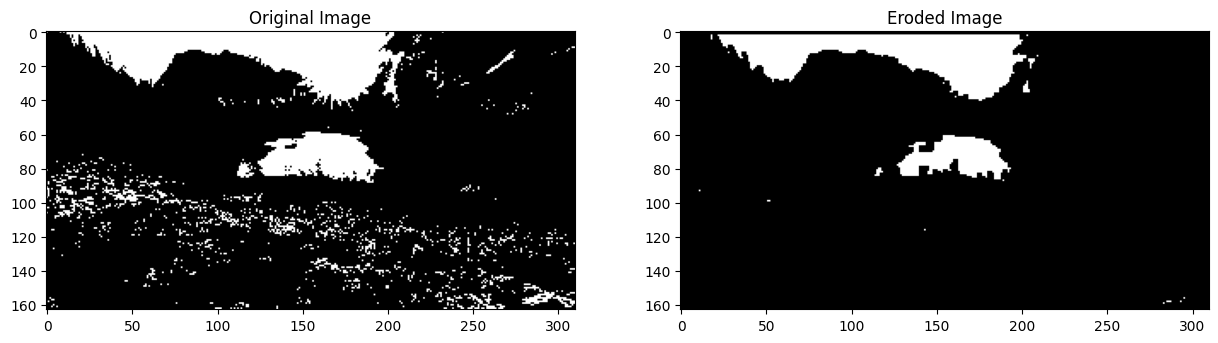

In [51]:
plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Eroded Image")
plt.imshow(eroded_image, cmap='gray')

plt.show()

# **Applying dilation and displaying the image**

In [48]:
kernel = np.ones((3, 3), dtype=np.uint8)

def image_dilation(input_image, struct_elem):
    img_h, img_w = input_image.shape
    k_h, k_w = struct_elem.shape
    padding_h, padding_w = k_h // 2, k_w // 2
    dilated_image = np.zeros_like(input_image)
    padded_img = np.pad(input_image, ((padding_h, padding_h), (padding_w, padding_w)), mode='constant', constant_values=0)
    for x in range(padding_h, img_h + padding_h):
        for y in range(padding_w, img_w + padding_w):
            region = padded_img[x - padding_h:x + padding_h + 1, y - padding_w:y + padding_w + 1]
            if np.sum(region * struct_elem) > 0:
                dilated_image[x - padding_h, y - padding_w] = 1

    return dilated_image

In [49]:
dilated_image = image_dilation(binary_image, kernel)

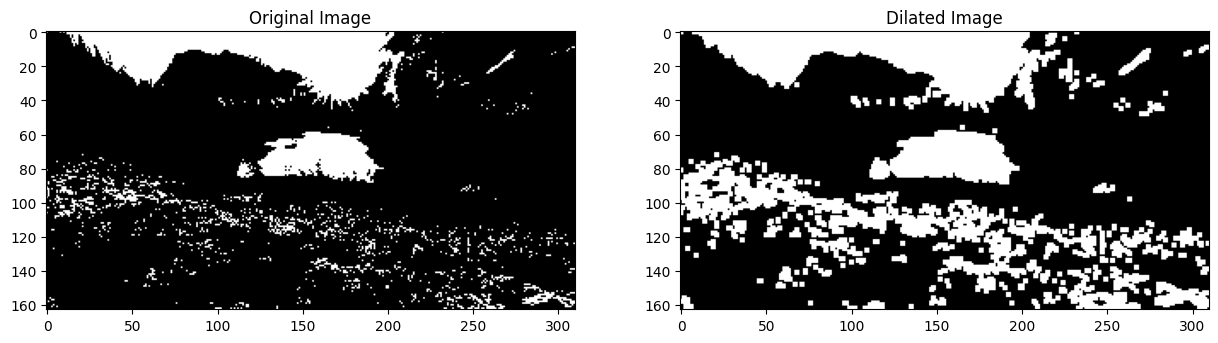

In [52]:
plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Dilated Image")
plt.imshow(dilated_image, cmap='gray')

plt.show()

# **Applying Opening and displaying the image**

In [40]:
def image_opening(image, kernel):
    eroded_image = erode(image, kernel)
    opened_image = dilate(eroded_image, kernel)
    return opened_image

In [41]:
opened_image = image_opening(binary_image, kernel)

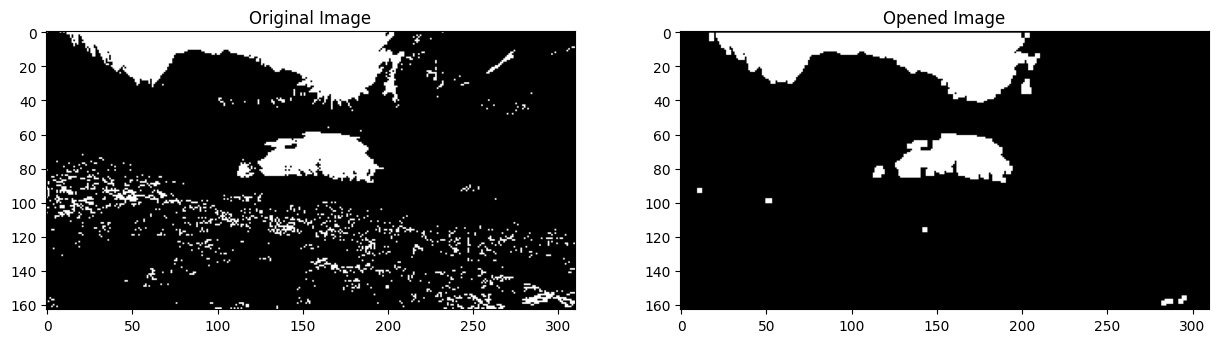

In [53]:
plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Opened Image")
plt.imshow(opened_image, cmap='gray')

plt.show()

# **Applying image closing and displaying the closing**

In [57]:
def image_closing(image, kernel):
    dilated_image = dilate(image, kernel)
    closed_image = erode(dilated_image, kernel)
    return closed_image

In [59]:
closed_image = image_closing(binary_image, kernel)

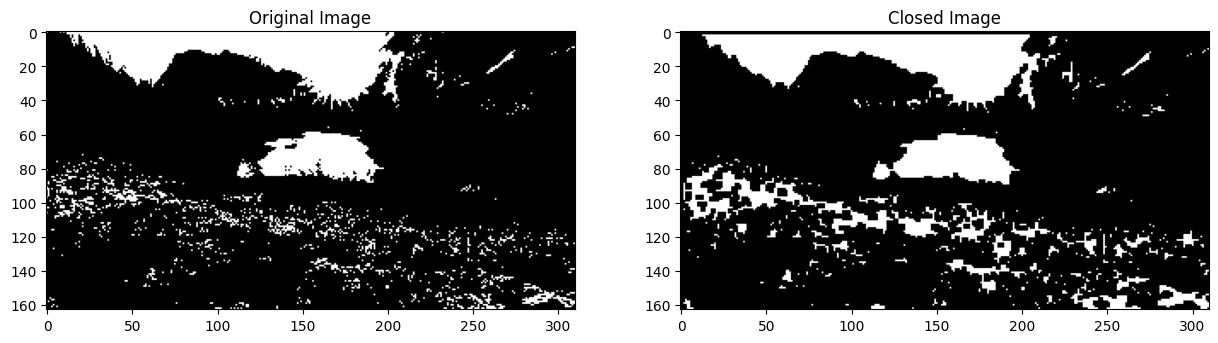

In [60]:
plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Closed Image")
plt.imshow(closed_image, cmap='gray')

plt.show()

# **Applying Hit and Miss Structure and displaying the image**

In [61]:
def hit_or_miss(input_image, structuring_element):
    img_h, img_w = input_image.shape
    k_h, k_w = structuring_element.shape
    pad_h, pad_w = k_h // 2, k_w // 2
    hit_miss_output = np.zeros_like(input_image)

    padded_img = np.pad(input_image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    for x in range(pad_h, img_h + pad_h):
        for y in range(pad_w, img_w + pad_w):
            local_region = padded_img[x - pad_h:x + pad_h + 1, y - pad_w:y + pad_w + 1]

            if np.all((local_region == structuring_element) | (structuring_element == 0)):
                hit_miss_output[x - pad_h, y - pad_w] = 1

    return hit_miss_output

In [62]:
hit_and_miss_image = hit_and_miss(binary_image, kernel)

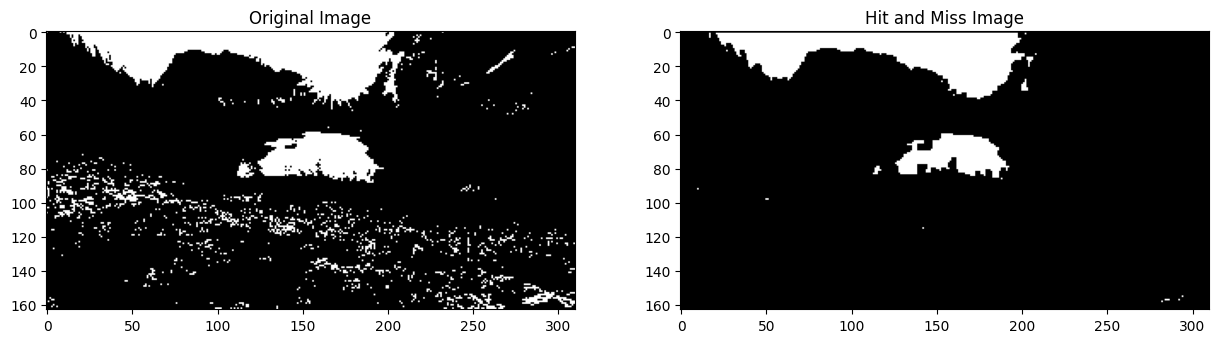

In [64]:
plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Hit and Miss Image")
plt.imshow(hit_and_miss_image, cmap='gray')

plt.show()

# **APPLICATIONS**


# 1. **Erosion**
**Noise Removal**: Erosion can be used to remove small-scale noise from binary images by eroding away the boundaries of foreground objects.

**Shape Simplification**: It helps in simplifying the shapes of objects, which is useful for shape analysis.

**Boundary Extraction**: By applying erosion followed by dilation, you can extract boundaries of objects.

# 2. **Dilation**
**Object Expansion**: Dilation expands the boundaries of objects, which can be used to fill small holes or gaps in objects in a binary image.

**Connecting Components**: It can connect disjoint elements in an image, useful in applications like character recognition or feature extraction.

**Foreground Object Highlighting**: Dilation can enhance the visibility of objects by increasing their size.

# **3. Opening**
**Shape Analysis**: Opening is useful for removing small objects from an image while preserving the shape and size of larger objects. It is often used in preprocessing steps before further analysis.

**Background Extraction**: Helps in separating objects from the background in images with varying intensity.

**Skeletonization**: Used to thin out structures in an image while preserving their topology.

# **4. Closing**
**Filling Small Holes**: Closing can be used to fill small holes in the foreground objects of a binary image.

**Connecting Nearby Objects**: It can connect nearby objects, which can be useful in applications like medical imaging where structures are closely spaced.

**Noise Reduction**: Helps in reducing noise in an image by smoothing out boundaries.

# **5. Hit-or-Miss Transformation**
**Template Matching**: This transformation is effective in detecting specific shapes or patterns within an image, useful in applications like character recognition or object detection.

**Feature Extraction**: It can be used to extract specific features or configurations from binary images.

**Pattern Recognition**: Useful in applications where specific configurations of foreground and background pixels need to be identified.

# **CONCLUSION**

Morphological transformations, including erosion, dilation, opening, closing, and hit-or-miss, play a crucial role in image processing and computer vision. By manipulating the shapes and structures within images, these techniques enable effective noise reduction, object recognition, and feature extraction. Their diverse applications span across fields such as medical imaging, document analysis, and object detection, showcasing their importance in enhancing the quality and interpretability of visual data. Understanding and utilizing these transformations can significantly improve the performance of various image processing tasks, making them essential tools for researchers and practitioners in the domain